In [ ]:
# Usual
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
ok_num = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/numecial.csv')

In [ ]:
ok_num.head()

,id,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,offspring,pets,smokes
0,0,22,0,0,0,2,0,2,0,1,75.0,0,1,0,3
1,1,35,0,0,0,1,4,3,1,6,70.0,80000,1,0,0
2,7,31,0,1,0,1,0,2,0,1,65.0,0,1,0,0
3,14,29,0,1,0,0,0,2,0,1,62.0,50000,1,0,0
4,19,33,0,0,0,4,0,2,0,2,72.0,0,0,0,0


In [ ]:
ok_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9055 non-null   int64  
 1   age          9055 non-null   int64  
 2   status       9055 non-null   int64  
 3   sex          9055 non-null   int64  
 4   orientation  9055 non-null   int64  
 5   body_type    9055 non-null   int64  
 6   diet         9055 non-null   int64  
 7   drinks       9055 non-null   int64  
 8   drugs        9055 non-null   int64  
 9   education    9055 non-null   int64  
 10  height       9055 non-null   float64
 11  income       9055 non-null   int64  
 12  offspring    9055 non-null   int64  
 13  pets         9055 non-null   int64  
 14  smokes       9055 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 1.0 MB


In [ ]:
raw = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/OkCupid.csv')

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9055 non-null   int64  
 1   Full_essay   8804 non-null   object 
 2   age          9055 non-null   int64  
 3   status       9055 non-null   int64  
 4   sex          9055 non-null   int64  
 5   orientation  9055 non-null   int64  
 6   body_type    9055 non-null   int64  
 7   diet         9055 non-null   int64  
 8   drinks       9055 non-null   int64  
 9   drugs        9055 non-null   int64  
 10  education    9055 non-null   int64  
 11  height       9055 non-null   float64
 12  income       9055 non-null   int64  
 13  location     9055 non-null   object 
 14  offspring    9055 non-null   int64  
 15  pets         9055 non-null   int64  
 16  smokes       9055 non-null   int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 1.2+ MB


In [ ]:
raw.head(3)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,location,offspring,pets,smokes
0,0,about me: i would love to think that i was so...,22,0,0,0,2,0,2,0,1,75.0,0,"south san francisco, california",1,0,3
1,1,i am a chef: this is what that means. 1. i am ...,35,0,0,0,1,4,3,1,6,70.0,80000,"oakland, california",1,0,0
2,7,"writing. meeting new people, spending time wit...",31,0,1,0,1,0,2,0,1,65.0,0,"san francisco, california",1,0,0


In [ ]:
raw['sex'].describe()

count    9055.000000
mean        0.458421
std         0.498296
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

**Orientation Distribution**

Text(0, 0.5, 'counts')

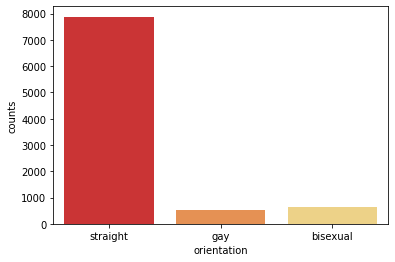

In [ ]:
raw['orientation'].unique()
orien_dis = sns.barplot(x = raw['orientation'].unique(), y = raw['orientation'].value_counts(), palette="YlOrRd_r")
orien_dis = orien_dis.set_xticklabels(['straight', 'gay', 'bisexual'])
plt.xlabel('orientation')
plt.ylabel('counts')

**Income Distribution**

Text(0, 0.5, 'counts')

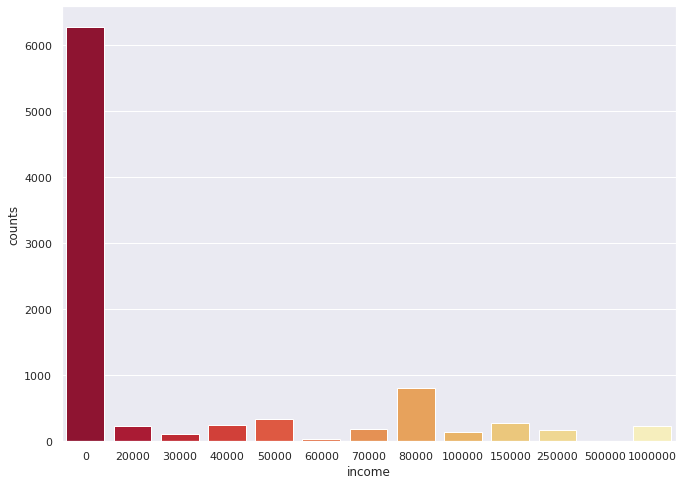

In [ ]:
raw['income'].unique()
sns.set(rc={'figure.figsize':(11,8)})
orien_dis = sns.barplot(x = raw['income'].unique(), y = raw['income'].value_counts(), palette="YlOrRd_r")
# orien_dis = orien_dis.set_xticklabels(['0', '', 'bisexual'])
plt.xlabel('income')
plt.ylabel('counts')

**Age Distribution**

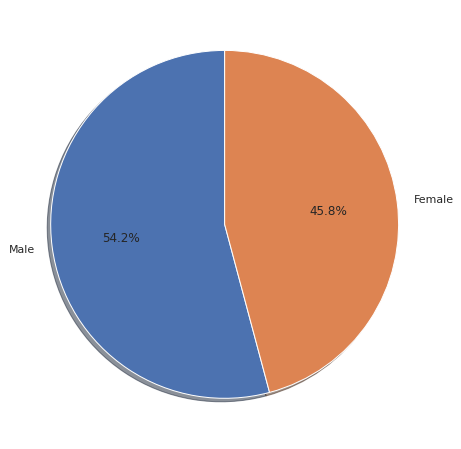

In [ ]:
find_replace_sex = {"sex" : {0: "Male", 1:"Female"}}
raw.replace(find_replace_sex, inplace=True)
labels = 'Male', 'Female'
size=[len(raw[raw['sex']=="Male"]),len(raw[raw['sex']=="Female"])]
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

 **Status Summary**

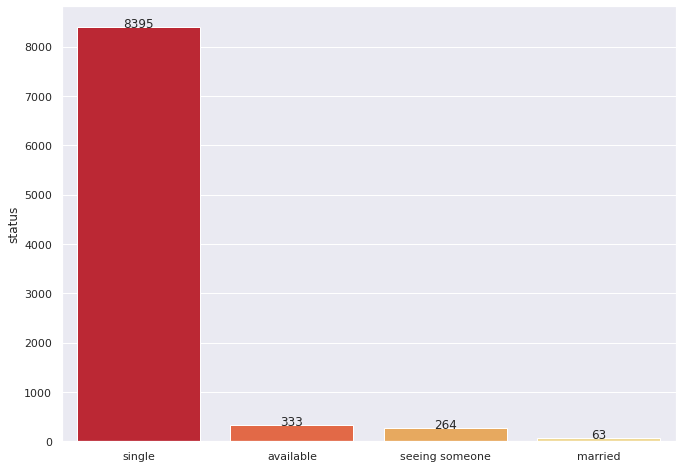

In [ ]:
find_replace_status = {"status" : {0: "single", 1: "available", 2: "seeing someone", 3: "married"}}
raw.replace(find_replace_status, inplace=True)
graph=sns.barplot(x=raw['status'].unique(),y=raw['status'].value_counts(),palette="YlOrRd_r")
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        int(height),ha="center")

**Age Distribution**

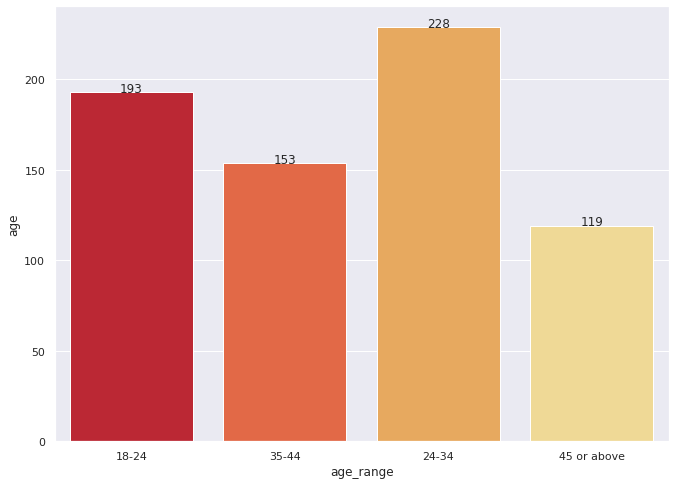

In [ ]:

a = []
for i in raw['age']:
  if i < 18:
    a.append("0-17")
  elif (i >= 18) & (i < 25):
    a.append("18-24")
  elif (i >= 25) & (i < 35):
    a.append("24-34")
  elif (i >= 35) & (i < 45):
    a.append("35-44")
  else:
    a.append("45 or above")

raw['age_range'] = a

gr=sns.barplot(x=raw['age_range'],y=raw['age'].value_counts(),palette="YlOrRd_r",ci=None)
for p in gr.patches:
    height = p.get_height()
    gr.text(p.get_x()+p.get_width()/2., height + 0.1,
        int(height),ha="center")


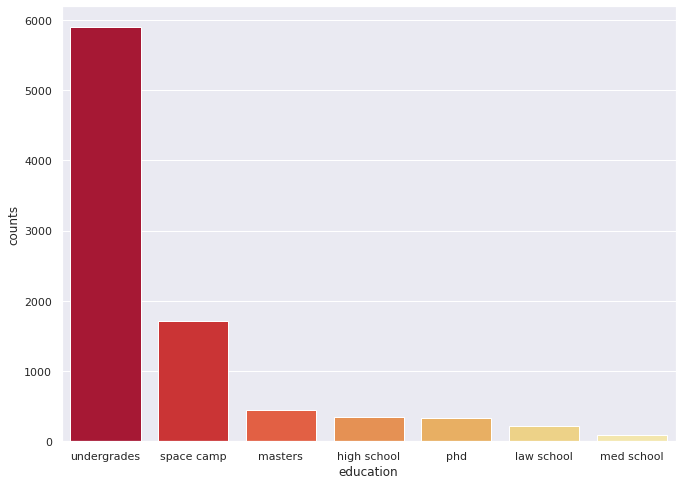

In [ ]:
find_replace_edu = {"education" : {0:"high school", 1:"undergrades", 2:"masters", 3:"phd", 
                                   4:"law school", 5:"med school", 6:"space camp"}}
raw.replace(find_replace_edu, inplace=True)

edu_dis = sns.barplot(x = raw['education'].unique(), y = raw['education'].value_counts(), palette="YlOrRd_r")
plt.xlabel('education')
plt.ylabel('counts');
sns.set(font_scale=1)